# Сравнение полученных решений
В проекте реализованы следующие решения:
* [Решение №1 - Фильтрация](./Solution1.ipynb)
* [Решение №2 - Равное голосование](./Solution2.ipynb)

В данном файле будет проведено сравнение полученных результатов.

## Импорт реализованных алгоритмов

In [7]:
from src import *

## Группировка данных

In [8]:
dataset_path = '../data/sample.json'
groups1 = solution1.group_by_filtering(dataset_path)  # Поиск групп по алгоритму решения №1

  0%|          | 0/412 [00:00<?, ?it/s]

  0%|          | 0/412 [00:00<?, ?it/s]

  0%|          | 0/412 [00:00<?, ?it/s]

  0%|          | 0/412 [00:00<?, ?it/s]

  0%|          | 0/412 [00:00<?, ?it/s]

In [9]:
groups2 = solution2.group_by_equal_vote(dataset_path) # Поиск групп по алгоритму решения №2

  0%|          | 0/412 [00:00<?, ?it/s]

## Полученные группы

In [10]:
groups1 ## Решение 1

[['никто туда больше не ходит', 'никто больше туда не ходит'],
 ['у него с собой не было тогда денег', 'у него тогда не было с собой денег'],
 ['я больше не хочу с тобой играть', 'я не хочу с тобой больше играть'],
 ['что сделал том с деньгами', 'что сделел том с деньгами'],
 ['том меня сейчас хочет видеть', 'том хочет меня сейчас видеть'],
 ['я его больше не увижу', 'я больше его не увижу'],
 ['том и мэри объявили сегодня о своей пбмолвке',
  'том и мэри объявили сегодня о своей помолвке'],
 ['я не могу больше ждать', 'я больше не могу ждать'],
 ['мост очень длинный и высокий', 'мост очень длинный и очень высокий'],
 ['пусть свиньи это едят', 'пусть это свиньи едят'],
 ['ты хотел мне рассказать о свободе', 'ты хотел рассказать мне о свободе'],
 ['что пел джон на сцене', 'что джон пел на сцене'],
 ['я написал влера письмо', 'я написал вчера письмо'],
 ['мы не были готовы', 'мы были не готовы'],
 ['они их только что нашли', 'они только что их нашли'],
 ['том не знает ничего о семье мэри

In [11]:
groups2 ## Решение 2

[['ты нашел их или нет'],
 ['почему она так со мной поступает'],
 ['никто туда больше не ходит', 'никто больше туда не ходит'],
 ['у него с собой не было тогда денег', 'у него тогда не было с собой денег'],
 ['почему они с нами так поступают'],
 ['он всю ночь стонал от сильной боли'],
 ['я больше не хочу с тобой играть', 'я не хочу с тобой больше играть'],
 ['тому было тогда всего тринадцать лет'],
 ['что сделал том с деньгами', 'что сделел том с деньгами'],
 ['том меня сейчас хочет видеть', 'том хочет меня сейчас видеть'],
 ['он даже меня не замечает'],
 ['тебе это все нравится'],
 ['я его больше не увижу', 'я больше его не увижу'],
 ['почему она так с ней поступает'],
 ['я хотел бы учиться в бостоне'],
 ['том и мэри объявили сегодня о своей пбмолвке',
  'том и мэри объявили сегодня о своей помолвке'],
 ['том этим сейчас занимается'],
 ['я не могу больше ждать', 'я больше не могу ждать'],
 ['мост очень длинный и высокий', 'мост очень длинный и очень высокий'],
 ['том был просто не гот

## Сравнение групп по размеру
Рассмотрим количество найденных групп размеров 1, 2 и 3.

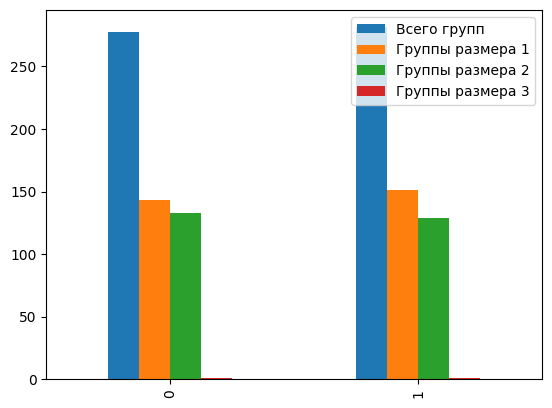

In [12]:
import pandas as pd
import numpy as np

def count_of_size(groups, request_size):
    return len([group for group in groups if len(group) == request_size])

count_data = [
    [len(groups1), count_of_size(groups1, 1), count_of_size(groups1, 2), count_of_size(groups1, 3)],
    [len(groups2), count_of_size(groups2, 1), count_of_size(groups2, 2), count_of_size(groups2, 3)]
]

df2 = pd.DataFrame(count_data, columns=["Всего групп", "Группы размера 1", "Группы размера 2", "Группы размера 3"])
df2.plot.bar();

Можно увидеть, что решения дали похожие результаты.

## Сравнение полученных результатов

In [13]:
# Функция поиска разлиций между найденными наборами групп
def find_difference(group1, group2):
    diff1 = [g for g in group1 if g not in group2]
    diff2 = [g for g in group2 if g not in group1]
    return diff1, diff2

In [14]:
groups1 = [set(g) for g in groups1]
groups2 = [set(g) for g in groups2]
diff1, diff2 = find_difference(groups1, groups2)

#### Наборы, которые выдает решение 1, но не выдает решение 2:

In [21]:
diff1 

[{'том не живет в бостоне', 'том сейчас не живет в бостоне'},
 {'она никогда нам ничего не рассказывает',
  'том никогда нам ничего не рассказывает'},
 {'многие птицы на зиму улетают на юг', 'многие птицы осенью улетают на юг'},
 {'я ничего не могу доказать', 'я ничего не хочу делать'}]

In [22]:
len(diff1)

4

 #### Наборы, которые выдает решение 2, но не выдает решение 1:

In [23]:
diff2

[{'я ничего не хочу делать'},
 {'многие птицы осенью улетают на юг'},
 {'том не живет в бостоне'},
 {'она никогда нам ничего не рассказывает'},
 {'многие птицы на зиму улетают на юг'},
 {'я ничего не могу доказать'},
 {'том никогда нам ничего не рассказывает'},
 {'том сейчас не живет в бостоне'}]

In [24]:
len(diff2)

8

## Разбор различий решений
* [Решение №1](./Solution1.ipynb): более гибкое решение, которое группирует строки, которые очень похожи друг на друга по смыслу и структуре
* [Решение №2](./Solution2.ipynb): более строгое решение, расчитанное на поиск строк с минимальными отличиями по смыслу и структуре.


# Вывод
В ходе работы было реализовано 2 подхода к решению задачи группировки рерайтов. Оба подхода хорошо справились с задачей на исходном датасете. Полученные результаты очень близки друг к другу и отличаются только в конкретных местах специализации решений.